# Extract 24h of forecast on one point, and compare it to an observation dataset

In [1]:
%matplotlib inline
import os
import epygram
epygram.init_env()
workdir = epygram.config.userlocaldir + '/notebooks_data'
os.chdir(workdir)

In [2]:
files = ['advanced_examples/ICMSHAROM+{:0>4}'.format(i) for i in range(0,24+1)]

In [3]:
r = epygram.resources.meta_resource(files, 'r', 'MV')  # 'MV' == MultiValidities

In [4]:
rh2m = r.readfield('CLSHUMI.RELATIVE')
print(len(rh2m.validity))
print(rh2m.data.shape)

25
(25, 720, 750)


In [5]:
obs = epygram.formats.resource('advanced_examples/Toulouse_2015-02-16.nc', 'r')

In [6]:
obspt = obs.readfield('HU_AIR_ABRI_5M')

In [7]:
pt = rh2m.extract_point(1.43, 43.6)
pt.operation('*', 100)
print(pt.data.shape)

(25,)


In [8]:
print type(pt), type(pt) == type(obspt)

<class 'epygram.fields.PointField.PointField'> True


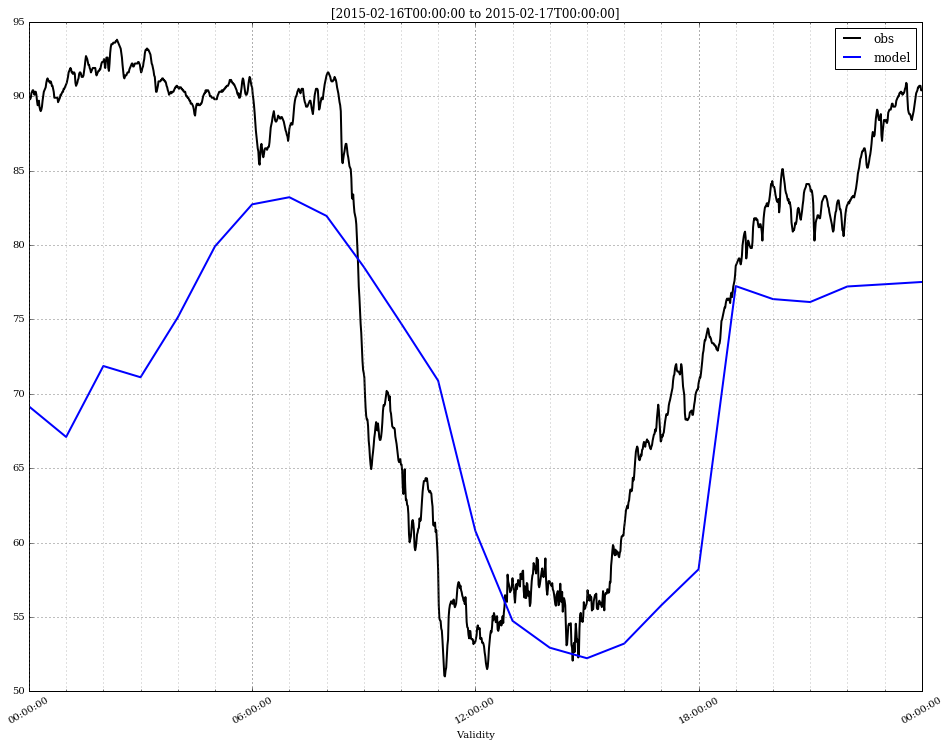

In [9]:
fig, ax = obspt.plotfield(plot_kwargs={'label':'obs', 'color':'black', 'linestyle':'-', 'lw':2})
fig, ax = pt.plotfield(plot_kwargs={'label':'model', 'color':'blue', 'linestyle':'-', 'lw':2}, over=(fig, ax))

In [10]:
pt.dump_to_nc('obs_equiv.nc', variablename='rh2m')